<a href="https://colab.research.google.com/github/the-faisalahmed/Optimization/blob/main/Tower_of_Hanoi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random
import itertools
import copy

In [ ]:
current_state = [[3, 2, 1], [0], [0]]
original_state = current_state.copy()
winning_state = [[0], [0], [3, 2, 1]]

In [ ]:
len(state_action)

27

In [ ]:
possible_states = [[0],[1],[2],[3], [3,2], [2, 1], [3, 1],[3, 2, 1]]

def get_top_value(action):
  return current_state[moves[action][1]][-1]

moves = {
      1: (get_top_value, 0,1),
      -1: (get_top_value, 1,0),
      2: (get_top_value, 0,2),
      -2: (get_top_value, 2,0),
      3: (get_top_value, 1,2),
      -3: (get_top_value, 2,1)
}

move_names = {
      1: 'A to B',
      -1: 'B to A',
      2: 'A to C',
      -2: 'C to A',
      3: 'B to C',
      -3: 'C to B'
}

In [ ]:
def new_state(array, action):
  current = copy.deepcopy(array)

  a = current[moves[action][1]][-1]

  moving_tower = current[moves[action][1]]
  target_tower = current[moves[action][2]]
  # Removing piece from tower
  if len(moving_tower) == 1:
    current[moves[action][1]] = [0]
  else:
    current[moves[action][1]] = moving_tower[slice(len(moving_tower)-1)]

  # Placing piece on tower
  if target_tower == [0]:
    current[moves[action][2]].pop()
    current[moves[action][2]].append(a)
  else:
    current[moves[action][2]].append(a)
  return current

# This functions sets rules for which moves are allowed. It does not allow moves
# that would place larger pieces on smaller pieces, or moves that would allow
# any location with zero pieces to be able to move
def valid_actions(array):
  current_state = copy.deepcopy(array)
  list_of_moves = []

  for i in moves:
    # Restricting moving pieces from any tower that does not have a piece
    if current_state[moves[i][1]][-1] == 0:
      continue
    # Restricting moves that would place larger pieces on top of smaller pieces
    elif current_state[moves[i][1]][-1] > current_state[moves[i][2]][-1] and \
        current_state[moves[i][2]][-1] != 0:
      continue
    else:
      list_of_moves.append(i)
  return list_of_moves

def rewards(state, action):
    state = copy.deepcopy(state)
    # Rewarding winning state
    if list(new_state(list(state),action)) == winning_state:
      return 10
    # Rewarding states that move piece 3 from location A to location C
    elif state[moves[action][1]][-1] == 3 and move_names[action] in ['A to C']:
      return 3
    # Penalizing moving a tower consisting of one piece to another tower consisting
    # of no pieces
    elif len(state[moves[action][1]]) == 1 and state[moves[action][2]] == [0]:
      return -2
    # Penalizing all other cases
    else:
      return -1

def done(current_state):
  return list(current_state) == winning_state

In [ ]:
# Creating combinations of states
valid_state_space = [[[3,2,1],[0],[0]],
                    [[2,1],[3],[0]],
                      [[3,1],[2],[0]],
                     [[3,2],[1],[0]],
                     [[3],[2],[1]]]

# Creating permutations of states
q_table_temp = []
for i in range(len(valid_state_space)):
  t = list(itertools.permutations(valid_state_space[i]))
  [q_table_temp.append(i) for i in t if i not in q_table_temp]

state_action = {}

for i in q_table_temp:
  state_action[str(i)] = (i, valid_actions(list(i)))


In [ ]:
state_action

In [ ]:
# Creating Q table
q_table = {}
test = copy.deepcopy(state_action)

for i in test.keys():
  q_table[i] = []
  for j in test[i][1]:
    test2 = new_state(list(test[i][0]), j)
    reward = rewards(test[i][0],j)
    q_table[i].append(reward)

q_table

Episode: 0
Episode: 100
Episode: 200
Episode: 300
Episode: 400
Episode: 500
Episode: 600
Episode: 700
Episode: 800
Episode: 900
Episode: 1000
Episode: 1100
Episode: 1200
Episode: 1300
Episode: 1400
Episode: 1500
Episode: 1600
Episode: 1700
Episode: 1800
Episode: 1900
Training finished.



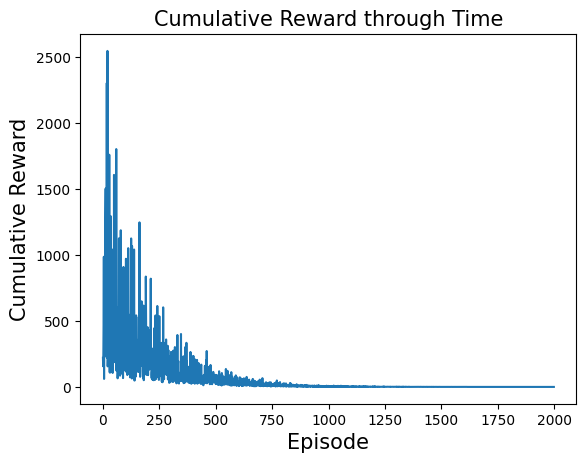

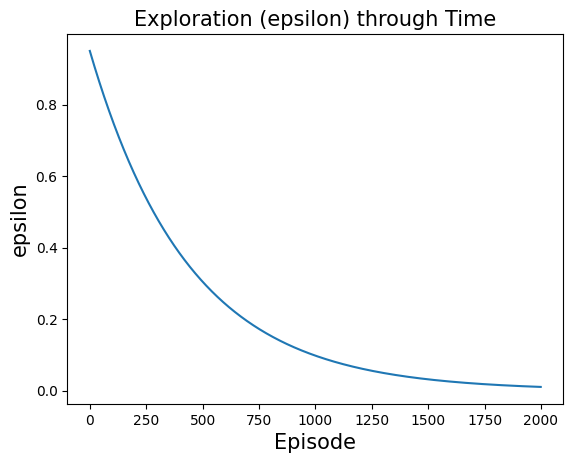

In [ ]:
epsilon = 0.95
gamma = .99
alpha = 0.99

# For plotting metrics
cumulative_reward_each_episode = []
epsilon_each_episode = []

# For each episode
maxNumEpisodes = 2000
for i in range(maxNumEpisodes):

  # Reset to initial conditions
  state = str(tuple(original_state))

  # The variable 'cumulative_reward' will store the sum of the accumulated
  # reward for an entire episode. Set this value to zero at the start of each
  # episode.

  cumulative_reward = 0

  over = False

  # While the episode is not finished
  while not over:
    step = 0

    ##########################################
    # For every time step, using epsilon-greedy to choose between
    # exploration and exploitation.
    # Implement epsilon-greedy exploration.
    # Hint: to return a random action, do this:
    #           action = env.action_space.sample()
    ##########################################

    if np.random.random() >= epsilon:
      action = np.argmax(q_table[state])
    else:
      action = random.randint(0,len(q_table[state])-1)

    over = state_action[state][0] == tuple(winning_state)

		# Take the action.
		# This moves the agent to a new state and earns a reward

    current = copy.deepcopy(state_action[state][0])
    next_state = new_state(list(current), state_action[state][1][action])
    next_state = str(tuple(next_state))

    reward = q_table[state][action]


    # Add the reward just earned to the cumulative reward variable
    cumulative_reward += reward

    ##########################################
    # Update your estimate of Q(s,a)
    # Hint: to access a specific value in the q_table, do this:
    #            q_table[state, action]
    ##########################################

    q_table[state][action] = (1-alpha)*q_table[state][action] + \
                                alpha*(reward + gamma*np.max(q_table[next_state]) - q_table[state][action]) - step

    # Penalizing extra moves
    step += 1

    # Set your state variable to next_state for the next loop.
    state = next_state

    # If this episode is finished, take care of a few things:
    if over:
      # Save the cumulative reward from the previous episode to an array.
      cumulative_reward_each_episode.append(cumulative_reward)

      # Save the epsilon used in this episode.
      epsilon_each_episode.append(epsilon)

      ##########################################
      # Decay epsilon,
      # If you want to decay or change the value of epsilon at the end of
      # each episode, do so here.
      ##########################################

      epsilon = epsilon*.997726

  if i % 100 == 0:
    print('Episode: {0}'.format(i))

print("Training finished.\n")

# Plot the Cumulative Reward and Epsilon value through time.
fsize = 15

plt.plot(cumulative_reward_each_episode)
plt.title('Cumulative Reward through Time', fontsize=fsize)
plt.xlabel('Episode', fontsize=fsize)
plt.ylabel('Cumulative Reward', fontsize=fsize)
plt.show()

plt.plot(epsilon_each_episode)
plt.title('Exploration (epsilon) through Time', fontsize=fsize)
plt.xlabel('Episode', fontsize=fsize)
plt.ylabel('epsilon', fontsize=fsize)
plt.show()

In [ ]:
over = False

state = str(tuple(original_state))

finished_run = [state_action[state][0]]
moves_made = []

while True:

  print(state_action[state][0])

  ##########################################
  # Choose an action based on exploitation.
  ##########################################

  action = np.argmax(q_table[state])
  moves_made.append(state_action[state][1][action])

  current = copy.deepcopy(state_action[state][0])
  next_state = new_state(list(current), state_action[state][1][action])
  next_state = str(tuple(next_state))

  state = next_state

  finished_run.append(state_action[state][0])

  over = state_action[state][0] == tuple(winning_state)

  if over:
    print(state_action[state][0])
    break;

([3, 2, 1], [0], [0])
([3, 2], [0], [1])
([3], [2], [1])
([3], [2, 1], [0])
([0], [2, 1], [3])
([1], [2], [3])
([1], [0], [3, 2])
([0], [0], [3, 2, 1])


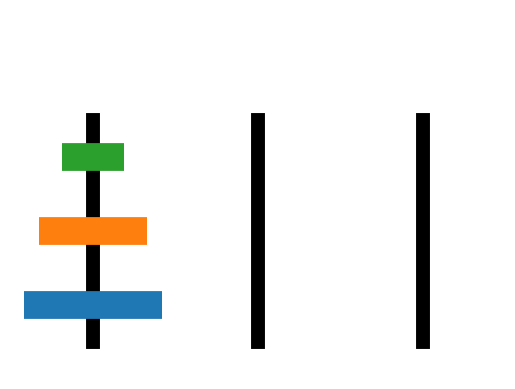

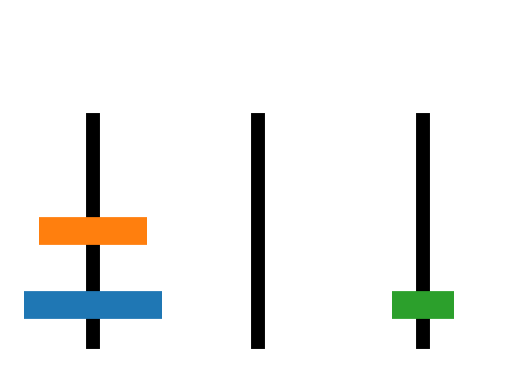

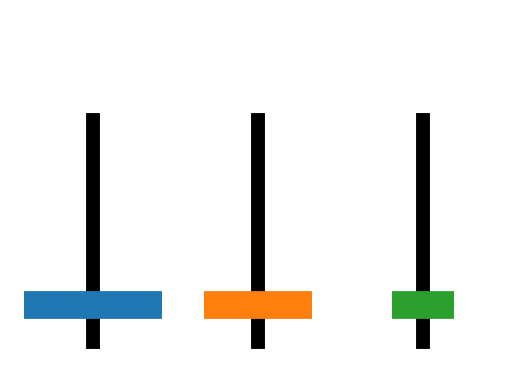

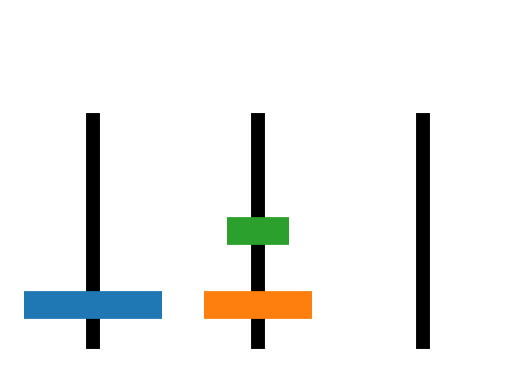

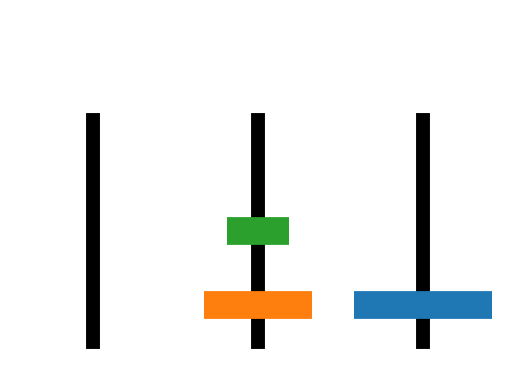

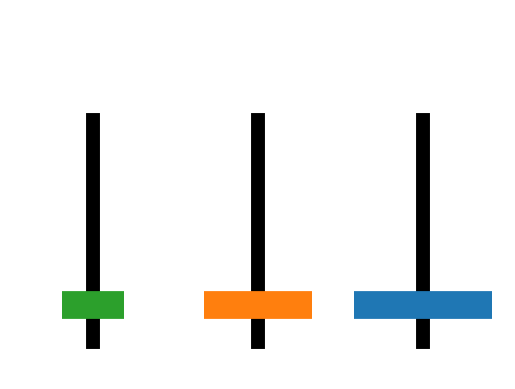

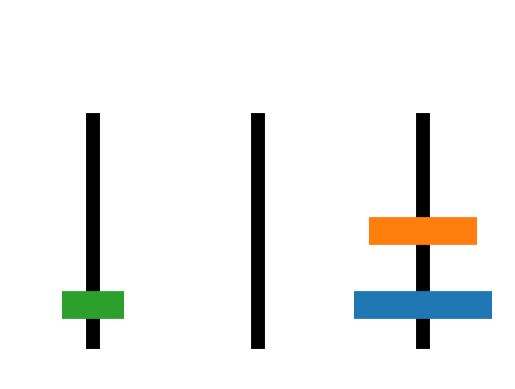

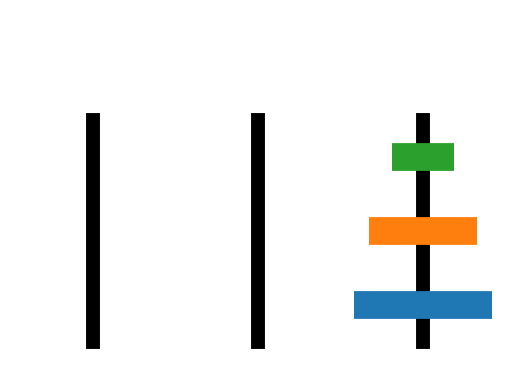

  adding: content/Towers/ (stored 0%)
  adding: content/Towers/Tower of Hanoi 5_.jpg (deflated 67%)
  adding: content/Towers/Tower of Hanoi 0_.jpg (deflated 65%)
  adding: content/Towers/Tower of Hanoi 6_.jpg (deflated 63%)
  adding: content/Towers/Tower of Hanoi 3_.jpg (deflated 64%)
  adding: content/Towers/Tower of Hanoi 1_.jpg (deflated 64%)
  adding: content/Towers/Tower of Hanoi 7_.jpg (deflated 63%)
  adding: content/Towers/Tower of Hanoi 2_.jpg (deflated 68%)
  adding: content/Towers/Tower of Hanoi 4_.jpg (deflated 64%)


In [ ]:
!mkdir Towers
number = 0
for x in finished_run:
  plt.clf()

  plt.xlim((0,6));
  plt.ylim((0,5));
  plt.axis('off');

  count = 0

  for i in [1,3,5]:
    plt.plot((i,i),(0.5,3.5), ms = 70, linewidth = 10, color = 'black', zorder = 0);
    count +=1

  count = 0

  for i in [1,3,5]:
    for j in range(1,len(x[i-count-1])+1):
      if x[i-count-1] == [0]:
        continue
      elif x[i-count-1][j-1] == 3:
        plt.scatter(i,j,marker ="_", linewidth = 20, s = 10000, c = '#1f77b4', zorder = 10);
      elif x[i-count-1][j-1] == 2:
        plt.scatter(i,j,marker ="_", linewidth = 20, s = 6000, c = '#ff7f0e', zorder = 10);
      else:
        plt.scatter(i,j,marker ="_", linewidth = 20, s = 2000, c = '#2ca02c', zorder = 10);
    count+=1
  plt.savefig('/content/Towers/Tower of Hanoi %d_%s'%(number,'.jpg'))
  plt.show()
  number+=1

!zip -r /content/Towers.zip /content/Towers